<a href="https://colab.research.google.com/github/sarikamohan08/MNIST/blob/main/CNN_architectures_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [86]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

dataset

In [88]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

Peforming reshaping operation

In [90]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Normalization

In [91]:
x_train = x_train / 255
x_test = x_test / 255

 One Hot Encoding

In [92]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Model 1

In [146]:
model1 = Sequential()
model1.add(Conv2D(16, kernel_size=(3,3),padding="same", activation='relu', input_shape=(28,28,1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, kernel_size=(3,3),padding="same", activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, kernel_size=(3,3), padding="same",activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [147]:
model1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 3, 3, 64)        

In [148]:
model1.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history=model1.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3540 - accuracy: 0.8835 - val_loss: 0.0627 - val_accuracy: 0.9799
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0919 - accuracy: 0.9715 - val_loss: 0.0364 - val_accuracy: 0.9885
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0678 - accuracy: 0.9790 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0537 - accuracy: 0.9835 - val_loss: 0.0264 - val_accuracy: 0.9908
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0216 - val_accuracy: 0.9925
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0444 - accuracy: 0.9866 - val_loss: 0.0229 - val_accuracy: 0.9926
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0214 - val_accuracy: 0.9926
Epoch 

In [149]:
history.params

{'epochs': 20, 'steps': 469, 'verbose': 1}

In [150]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.353985,0.883500,0.062731,0.9799
1,0.091882,0.971550,0.036411,0.9885
2,0.067763,0.978950,0.030396,0.9900
3,0.053745,0.983533,0.026438,0.9908
4,0.048645,0.985067,0.021590,0.9925
5,0.044441,0.986617,0.022858,0.9926
6,0.036457,0.988767,0.021390,0.9926
7,0.035294,0.989083,0.022519,0.9925
8,0.031984,0.989867,0.021899,0.9927
9,0.032013,0.990250,0.028382,0.9907


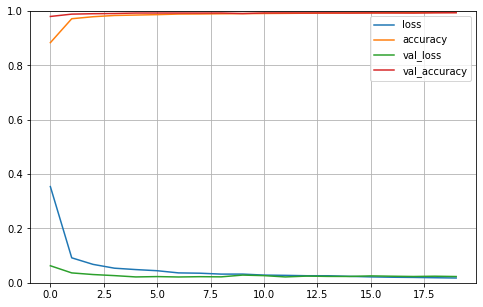

In [151]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [152]:
score = model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0230 - accuracy: 0.9937


In [154]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.023042108863592148
Test accuracy: 0.9937000274658203


In [165]:
accuracy1 = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy1)

Test accuracy: 99.1800%


# Model 2

In [155]:
model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(3,3),padding="same", activation='tanh', input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, kernel_size=(3,3),padding="same", activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(128, activation='tanh'))
model2.add(Dropout(0.4))
model2.add(Dense(64, activation='tanh'))
model2.add(Dense(10, activation='softmax'))

In [156]:
model2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_81 (Dense)             (None, 128)             

In [157]:
model2.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history2=model2.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2725 - accuracy: 0.9201 - val_loss: 0.0703 - val_accuracy: 0.9770
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1003 - accuracy: 0.9696 - val_loss: 0.0495 - val_accuracy: 0.9838
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0799 - accuracy: 0.9755 - val_loss: 0.0425 - val_accuracy: 0.9851
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0683 - accuracy: 0.9790 - val_loss: 0.0427 - val_accuracy: 0.9869
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0609 - accuracy: 0.9814 - val_loss: 0.0380 - val_accuracy: 0.9880
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 0.0383 - val_accuracy: 0.9886
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0505 - accuracy: 0.9844 - val_loss: 0.0371 - val_accuracy: 0.9887
Epoch 

In [158]:
pd.DataFrame(history2.history)

,loss,accuracy,val_loss,val_accuracy
0,0.272524,0.920117,0.070308,0.9770
1,0.100323,0.969617,0.049483,0.9838
2,0.079939,0.975500,0.042489,0.9851
3,0.068288,0.979017,0.042731,0.9869
4,0.060874,0.981433,0.038004,0.9880
5,0.056833,0.982767,0.038347,0.9886
6,0.050534,0.984450,0.037150,0.9887
7,0.048178,0.984817,0.030483,0.9898
8,0.045971,0.985300,0.031811,0.9904
9,0.043776,0.986650,0.030334,0.9905


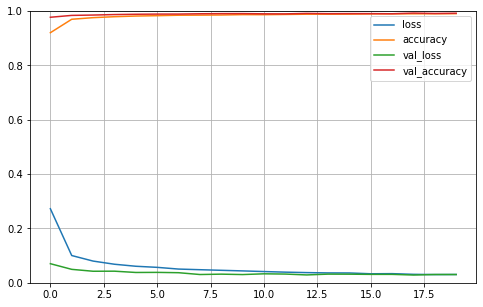

In [159]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [160]:
score = model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0304 - accuracy: 0.9918


In [161]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.030441882088780403
Test accuracy: 0.9918000102043152


In [162]:
accuracy2= 100*score[1]
print('Test accuracy: %.4f%%' % accuracy2)

Test accuracy: 99.1800%


# Model 3

In [298]:
model3 = Sequential()
model3.add(Conv2D(16, kernel_size=(3,3),padding="valid", activation='relu', input_shape=(28,28,1)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, kernel_size=(3,3),padding="valid", activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [299]:
model3.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_129 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_130 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_39 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 128)               102528    
_________________________________________________________________
dropout_47 (Dropout)         (None, 128)             

In [300]:
model3.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history3=model3.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3500 - accuracy: 0.8930 - val_loss: 0.0679 - val_accuracy: 0.9794
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0956 - accuracy: 0.9710 - val_loss: 0.0457 - val_accuracy: 0.9846
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0678 - accuracy: 0.9798 - val_loss: 0.0383 - val_accuracy: 0.9869
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0552 - accuracy: 0.9837 - val_loss: 0.0344 - val_accuracy: 0.9885
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0479 - accuracy: 0.9856 - val_loss: 0.0301 - val_accuracy: 0.9892
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0423 - accuracy: 0.9869 - val_loss: 0.0317 - val_accuracy: 0.9883
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0256 - val_accuracy: 0.9907
Epoch 

In [301]:
pd.DataFrame(history3.history)

,loss,accuracy,val_loss,val_accuracy
0,0.350014,0.893033,0.067865,0.9794
1,0.095635,0.971033,0.045678,0.9846
2,0.067752,0.979833,0.038278,0.9869
3,0.055159,0.983700,0.034397,0.9885
4,0.047906,0.985567,0.030096,0.9892
5,0.042342,0.986917,0.031746,0.9883
6,0.037080,0.988650,0.025594,0.9907
7,0.032765,0.989400,0.027206,0.9909
8,0.028849,0.990800,0.022799,0.9929
9,0.028710,0.990717,0.028205,0.9913


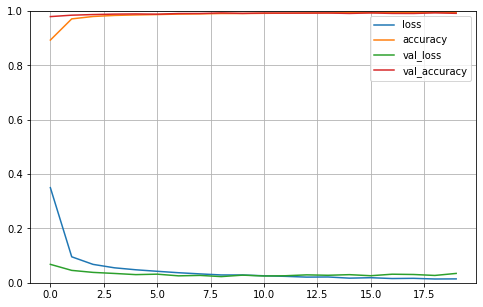

In [302]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [303]:
score = model3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9914


In [304]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.03450864180922508
Test accuracy: 0.9914000034332275


In [305]:
accuracy3 = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy3)

Test accuracy: 99.1400%


# Model 4

In [306]:
model4 = Sequential()
model4.add(Conv2D(16, kernel_size=(3,3),padding="same", activation='relu', input_shape=(28,28,1)))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(32, kernel_size=(3,3),padding="same", activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(64, kernel_size=(3,3), padding="same",activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(128, kernel_size=(3,3), padding="same",activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.3))
model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(10, activation='softmax'))

In [307]:
optimizers = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [308]:
model4.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=optimizers, metrics=['accuracy'])
history4=model4.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 2.2871 - accuracy: 0.1579 - val_loss: 2.2474 - val_accuracy: 0.4186
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 2.0062 - accuracy: 0.3688 - val_loss: 0.9045 - val_accuracy: 0.7486
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.7064 - accuracy: 0.7786 - val_loss: 0.2757 - val_accuracy: 0.9184
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3745 - accuracy: 0.8867 - val_loss: 0.1789 - val_accuracy: 0.9465
Epoch 5/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2736 - accuracy: 0.9179 - val_loss: 0.1442 - val_accuracy: 0.9574
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2216 - accuracy: 0.9346 - val_loss: 0.1175 - val_accuracy: 0.9641
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1926 - accuracy: 0.9427 - val_loss: 0.1028 - val_accuracy: 0.9677
Epoch 

In [309]:
pd.DataFrame(history4.history)

,loss,accuracy,val_loss,val_accuracy
0,2.287135,0.157933,2.247384,0.4186
1,2.006152,0.368850,0.904538,0.7486
2,0.706424,0.778583,0.275656,0.9184
3,0.374503,0.886750,0.178895,0.9465
4,0.273593,0.917900,0.144162,0.9574
5,0.221632,0.934600,0.117539,0.9641
6,0.192596,0.942700,0.102842,0.9677
7,0.172022,0.948500,0.092053,0.9701
8,0.151360,0.955267,0.082861,0.9727
9,0.138205,0.959550,0.077136,0.9743


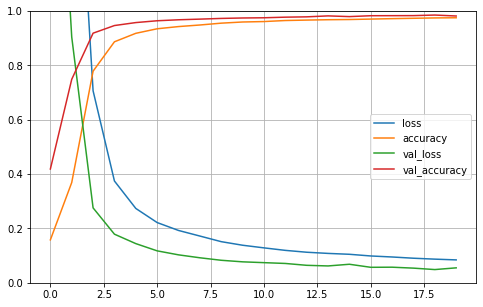

In [310]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [311]:
score = model4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0550 - accuracy: 0.9816


In [191]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 2.3025221824645996
Test accuracy: 0.11559999734163284


In [312]:
accuracy4 = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy4)

Test accuracy: 98.1600%


# Model 5

In [290]:
model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3,3),padding="same", activation='relu',input_shape=(28,28,1)))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(64, kernel_size=(3,3), padding="same",activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dense(10, activation='softmax'))

In [297]:
model5.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer='rmsprop', metrics=['accuracy'])
history5=model5.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1525 - accuracy: 0.9519 - val_loss: 0.0543 - val_accuracy: 0.9833
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0281 - val_accuracy: 0.9906
Epoch 3/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0307 - accuracy: 0.9908 - val_loss: 0.0381 - val_accuracy: 0.9887
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.0282 - val_accuracy: 0.9914
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0322 - val_accuracy: 0.9902
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.0385 - val_accuracy: 0.9899
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.0270 - val_accuracy: 0.9922
Epoch 

In [292]:
pd.DataFrame(history5.history)

,loss,accuracy,val_loss,val_accuracy
0,0.017182,0.994450,0.034077,0.9915
1,0.018429,0.993983,0.036050,0.9912
2,0.017110,0.994517,0.036946,0.9917
3,0.018571,0.994267,0.034420,0.9917
4,0.016661,0.994733,0.032073,0.9913
5,0.018301,0.993917,0.033651,0.9922
6,0.019838,0.993683,0.032276,0.9922
7,0.019283,0.993733,0.031752,0.9915
8,0.019757,0.993717,0.032935,0.9919
9,0.019675,0.993550,0.035128,0.9913


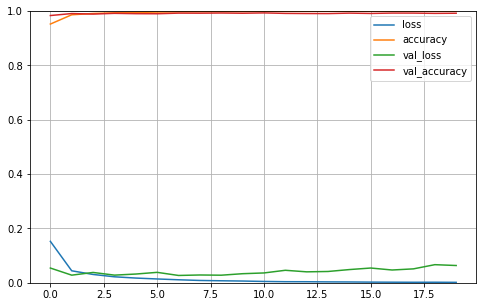

In [313]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [314]:
score5 = model5.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.9918


In [315]:
print('Test Loss:', score5[0])
print('Test accuracy:', score5[1])

Test Loss: 0.06360600888729095
Test accuracy: 0.9918000102043152


In [316]:
accuracy5 = 100*score5[1]
print('Test accuracy: %.4f%%' % accuracy5)

Test accuracy: 99.1800%


# Comparison chart

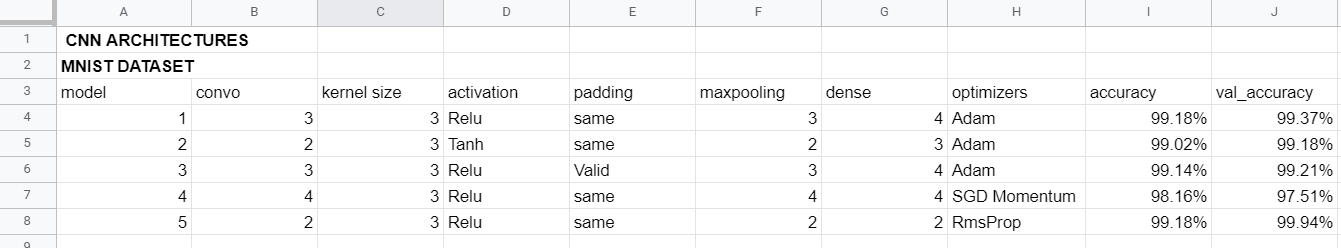